In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv


Actual column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Cleaned column names:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

✅ Using 'Yield' as the target column.
R² Score: 0.9944025986874337
RMSE: 4659.631005061921


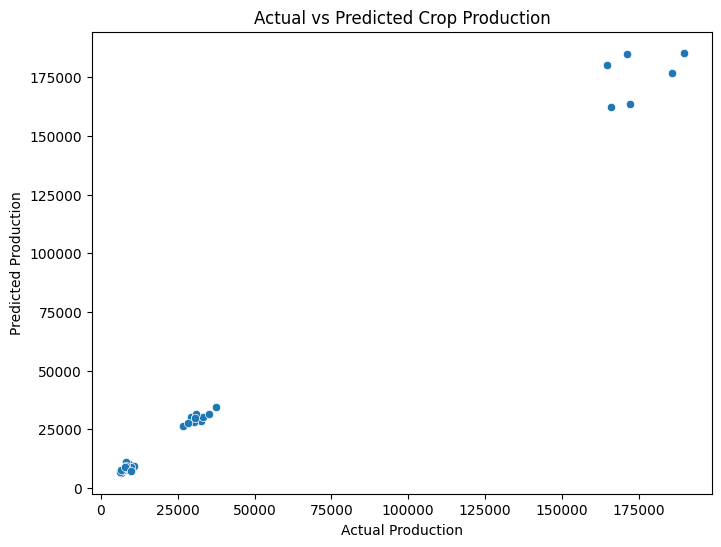

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Print actual column names
print("Actual column names:")
print(df.columns.tolist())

# Clean column names (remove leading/trailing whitespace)
df.columns = df.columns.str.strip()

# Print cleaned column names
print("\nCleaned column names:")
print(df.columns.tolist())

# Let’s assume the correct target column is the one with the name closest to 'Production'
# You can adjust this if needed
potential_targets = ['Production', 'production', 'Yield', 'yield']
target_col = None

for col in df.columns:
    if col.strip() in potential_targets:
        target_col = col
        break

# If still not found, show all column names and raise an error
if target_col is None:
    raise ValueError("Target column not found. Please check the column names listed above.")

print(f"\n✅ Using '{target_col}' as the target column.")

# Drop missing values
df = df.dropna()

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.show()

Original columns in dataset:
- Crop
- Precipitation (mm day-1)
- Specific Humidity at 2 Meters (g/kg)
- Relative Humidity at 2 Meters (%)
- Temperature at 2 Meters (C)
- Yield

✅ Target column selected: Yield
Model R² Score: 0.981
Model RMSE: 9300.35


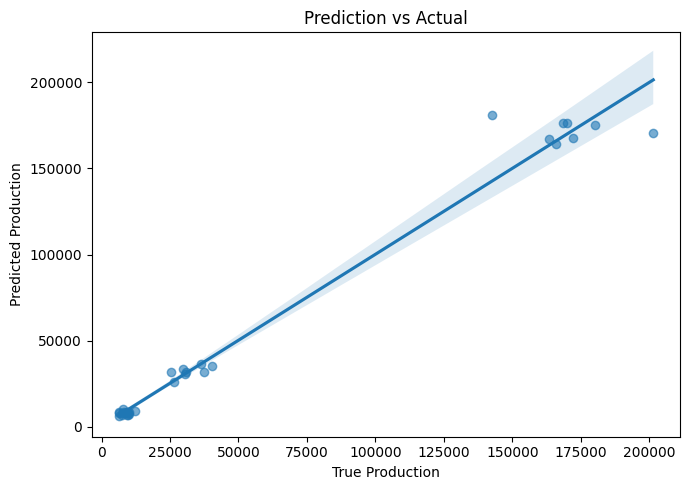

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('/kaggle/input/hhhhhhhhhh/crop yield predictionnn.csv')

# Show columns
print("Original columns in dataset:")
for col in data.columns:
    print(f"- {col}")

# Clean column names
data.columns = [col.strip() for col in data.columns]

# Detect possible target column
target_candidates = ['Production', 'production', 'Yield', 'yield']
target = next((col for col in data.columns if col in target_candidates), None)

if target is None:
    raise Exception("Target column not identified. Please verify column names.")

print(f"\n✅ Target column selected: {target}")

# Drop nulls
clean_data = data.dropna()

# Encode non-numeric data
encoders = {}
for col in clean_data.select_dtypes(include='object'):
    encoder = LabelEncoder()
    clean_data[col] = encoder.fit_transform(clean_data[col])
    encoders[col] = encoder

# Prepare feature matrix and target vector
features = clean_data.drop(columns=target)
labels = clean_data[target]

# Train-test split
train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=0)

# Model
regressor = RandomForestRegressor(n_estimators=120, random_state=0)
regressor.fit(train_X, train_y)

# Prediction and evaluation
predicted_y = regressor.predict(test_X)

r2 = r2_score(test_y, predicted_y)
rmse = mean_squared_error(test_y, predicted_y, squared=False)

print(f"Model R² Score: {r2:.3f}")
print(f"Model RMSE: {rmse:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(7, 5))
sns.regplot(x=test_y, y=predicted_y, scatter_kws={'alpha':0.6})
plt.xlabel("True Production")
plt.ylabel("Predicted Production")
plt.title("Prediction vs Actual")
plt.tight_layout()
plt.show()